<a href="https://colab.research.google.com/github/aws3ma/machine-learning/blob/main/sc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ml_folder='/content/drive/MyDrive/ML/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
df=pd.read_csv(ml_folder+'Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df=df.iloc[:,3:]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
import seaborn as sns

In [ ]:
c=df.corr(method="pearson")
c

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [ ]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
x = df.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y = df.iloc[:,-1:]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
x = pd.get_dummies(x,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train.iloc[:,:-3])
x_train.iloc[:,:-3]=sc.transform(x_train.iloc[:,:-3])
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,0,1,0
9275,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1,0,1
2995,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,0,0,0
5316,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,0,1,1
356,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1,0,0
4859,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,0,1,0
3264,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,0,0,1
9845,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,0,1,0


In [ ]:
x_test.iloc[:,:-3]=sc.transform(x_test.iloc[:,:-3])
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1,0,0
898,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,0,0,0
2398,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,0,1,0
5906,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,0,0,1
2343,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,0.642595,0.968738,1.404319,0,0,0
2899,-0.665441,-0.368904,0.698712,-1.215717,0.809503,0.642595,-1.032270,-0.511196,0,0,0
9549,-0.747912,-0.273200,-1.377440,1.297455,0.809503,0.642595,-1.032270,0.718885,0,1,1
2740,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,0.642595,0.968738,-1.545078,1,0,1


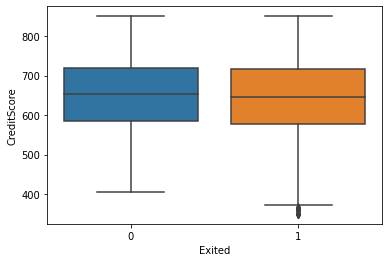

In [ ]:
sns.boxplot(x=df.Exited,y=df.CreditScore)

In [ ]:
df[df.CreditScore<=400]['Exited'].mean()

1.0

specificité et sensitivité
recall = TP/(TP+FN) = sensitivity = TPR <br/>
FPR = FP/(FP+TN) <br/>
specificity = 1 - FPR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_lr)

0.811

In [ ]:
def sensitivity_specificity(confusion_ma):
  ss = {}
  ss['sensitivity']=confusion_ma[0,0]/(confusion_ma[0,0]+confusion_ma[0,1])
  fpr = confusion_ma[1,0]/(confusion_ma[1,0]+confusion_ma[1,1])
  ss['specificity']=1-fpr
  return ss

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

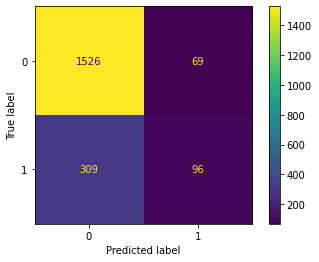

In [ ]:
cm = confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 0.9567398119122257, 'specificity': 0.23703703703703705}

propabilité de l'appartenance a la class 0 (!exited) et class 1(exited)

In [ ]:
y_pred_proba_lr = lr.predict_proba(x_test)

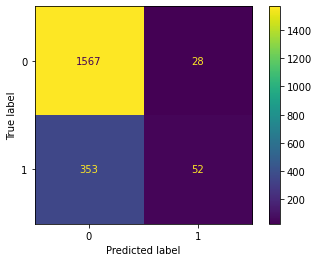

In [ ]:
y_pred_with_threshold_lr = (y_pred_proba_lr[:,1] >= 0.6).astype(int)
cm = confusion_matrix(y_test,y_pred_with_threshold_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(confusion_matrix(y_test,y_pred_with_threshold_lr))

{'sensitivity': 0.9824451410658307, 'specificity': 0.1283950617283951}

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr_lr, tpr_lr, th_lr = roc_curve(y_test,  y_pred_proba_lr[:,1])

In [ ]:
from sklearn.metrics import roc_auc_score

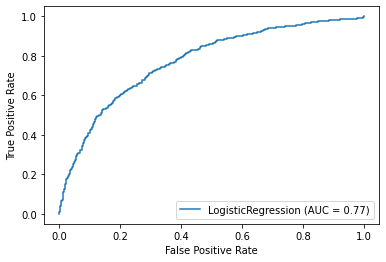

In [ ]:
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

AUC calculer l'air au dessous du courbe

In [ ]:
roc_auc_score(y_test,  y_pred_proba_lr[:,1])

0.7722481520182669

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_pred_knn = knn.predict(x_test)

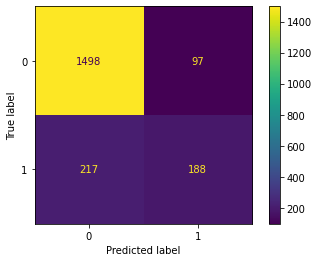

In [ ]:
cm = confusion_matrix(y_test,y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 0.9391849529780564, 'specificity': 0.46419753086419757}

In [ ]:
y_pred_proba_knn = knn.predict_proba(x_test)
fpr_knn, tpr_knn, th_knn = roc_curve(y_test,  y_pred_proba_knn[:,1])

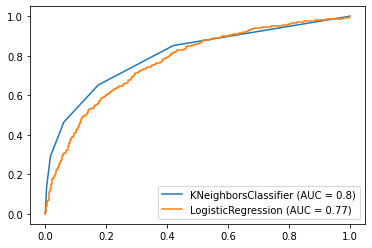

In [ ]:
plt.plot(fpr_knn,tpr_knn,label=knn.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_neighbors': 9}
0.843


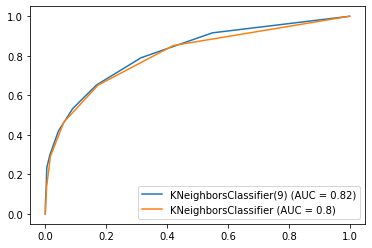

In [ ]:
knn_9 = KNeighborsClassifier(n_neighbors=9).fit(x_train,y_train)
y_pred_proba_knn_9=knn_9.predict_proba(x_test)
fpr_knn_9,tpr_knn_9,th_knn_9=roc_curve(y_test,y_pred_proba_knn_9[:,1])
plt.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
plt.plot(fpr_knn,tpr_knn,label=knn.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

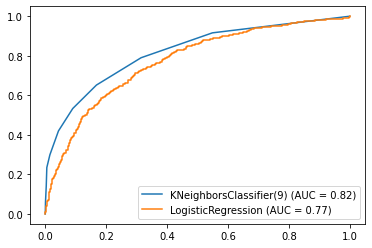

In [ ]:
plt.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc)

0.7975

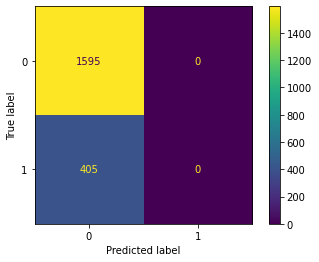

In [ ]:
cm=confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 1.0, 'specificity': 0.0}

In [ ]:
svc_rbf = SVC(kernel="rbf",probability=True)
svc_rbf.fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_svc_rbf)

0.8665

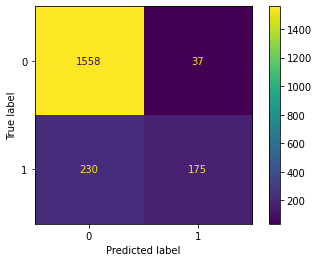

In [ ]:
cm=confusion_matrix(y_test,y_pred_svc_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 0.9768025078369906, 'specificity': 0.4320987654320988}

In [ ]:
y_pred_proba_svc_rbf = svc_rbf.predict_proba(x_test)
fpr_svc_rbf, tpr_svc_rbf, th_svc_rbf = roc_curve(y_test,  y_pred_proba_svc_rbf[:,1])

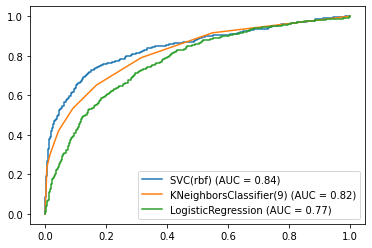

In [ ]:
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
accuracy_score(y_test,y_pred_dtc)

0.859

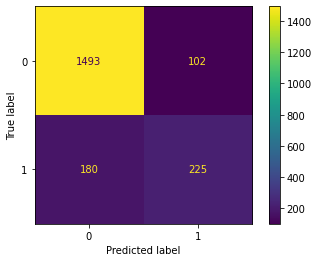

In [ ]:
cm=confusion_matrix(y_test,y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 0.936050156739812, 'specificity': 0.5555555555555556}

In [ ]:
y_pred_proba_dtc = dtc.predict_proba(x_test)
fpr_dtc, tpr_dtc, th_dtc = roc_curve(y_test,  y_pred_proba_dtc[:,1])

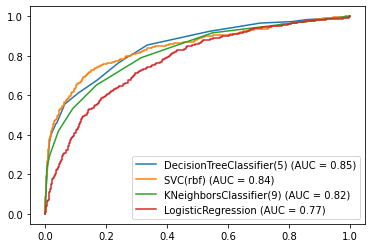

In [ ]:
plt.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(dtc,out_file=ml_folder+"decision_tree",feature_names=dtc.feature_names_in_,)

Transformer le fichier dot generer par la methode export_graphviz ver un fichier pdf :
https://drive.google.com/file/d/1-zg_ulxCk9mmN3RzuipcA4qJK4RIescf/view?usp=sharing

In [ ]:
from graphviz import Source
s = Source.from_file(ml_folder+"decision_tree")
s.view()

'/content/drive/MyDrive/ML/decision_tree.pdf'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(500)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
accuracy_score(y_test,y_pred_rfc)

0.866

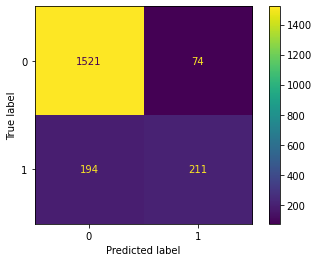

In [ ]:
cm=confusion_matrix(y_test,y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 0.9536050156739811, 'specificity': 0.5209876543209877}

In [ ]:
y_pred_proba_rfc = rfc.predict_proba(x_test)
fpr_rfc, tpr_rfc, th_rfc = roc_curve(y_test,  y_pred_proba_rfc[:,1])

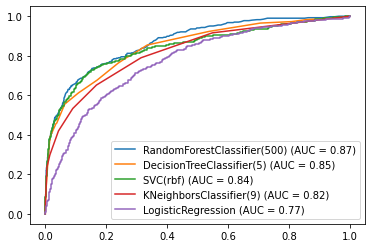

In [ ]:
plt.plot(fpr_rfc,tpr_rfc,label=rfc.__class__.__name__+"(500) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_rfc[:,1]),2))+")")
plt.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

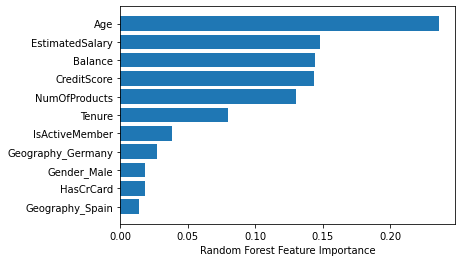

In [ ]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(rfc.feature_names_in_[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

refaire all models with new dataset with only 5 features

In [ ]:
df_filtered = df.filter(['Age','EstimatedSalary','Balance','CreditScore','NumOfProducts','Exited'])

In [ ]:
df_filtered.describe()

,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,100090.239881,76485.889288,650.528800,1.530200,0.203700
std,10.487806,57510.492818,62397.405202,96.653299,0.581654,0.402769
min,18.000000,11.580000,0.000000,350.000000,1.000000,0.000000
25%,32.000000,51002.110000,0.000000,584.000000,1.000000,0.000000
50%,37.000000,100193.915000,97198.540000,652.000000,1.000000,0.000000
75%,44.000000,149388.247500,127644.240000,718.000000,2.000000,0.000000
max,92.000000,199992.480000,250898.090000,850.000000,4.000000,1.000000


In [ ]:
df_filtered.corr(method="pearson")

,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts,Exited
Age,1.000000,-0.007201,0.028308,-0.003965,-0.030680,0.285323
EstimatedSalary,-0.007201,1.000000,0.012797,-0.001384,0.014204,0.012097
Balance,0.028308,0.012797,1.000000,0.006268,-0.304180,0.118533
CreditScore,-0.003965,-0.001384,0.006268,1.000000,0.012238,-0.027094
NumOfProducts,-0.030680,0.014204,-0.304180,0.012238,1.000000,-0.047820
Exited,0.285323,0.012097,0.118533,-0.027094,-0.047820,1.000000


In [ ]:
df_filtered.skew()

Age                1.011320
EstimatedSalary    0.002085
Balance           -0.141109
CreditScore       -0.071607
NumOfProducts      0.745568
Exited             1.471611
dtype: float64

In [ ]:
x_filtered = df_filtered.iloc[:,:-1]
y_filtered = df_filtered.iloc[:,-1:]

In [ ]:
x_filtered.head()

,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts
0,42,101348.88,0.00,619,1
1,41,112542.58,83807.86,608,1
2,42,113931.57,159660.80,502,3
3,39,93826.63,0.00,699,2
4,43,79084.10,125510.82,850,1


In [ ]:
y_filtered.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered=train_test_split(x_filtered,y_filtered,test_size=0.2,random_state=0)

In [ ]:
sc2=StandardScaler()
sc2.fit(x_train_filtered)
x_train_filtered.iloc[:,:]=sc2.transform(x_train_filtered.iloc[:,:])

In [ ]:
x_test_filtered.iloc[:,:]=sc2.transform(x_test_filtered.iloc[:,:])

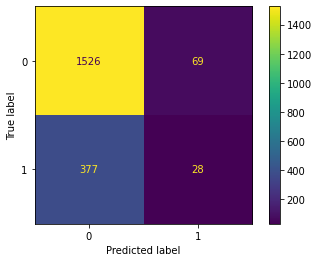

In [ ]:
lr_filtered = LogisticRegression()
lr_filtered.fit(x_train_filtered,y_train_filtered)
y_pred_lr_filtered = lr_filtered.predict(x_test_filtered)
cm=confusion_matrix(y_test_filtered,y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
lr_filtered.score(x_train_filtered,y_train_filtered)

0.780375

In [ ]:
accuracy_score(y_test_filtered,y_pred_lr_filtered)

0.777

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 0.9567398119122257, 'specificity': 0.06913580246913575}

In [ ]:
y_pred_proba_lr_filtered = lr_filtered.predict_proba(x_test_filtered)

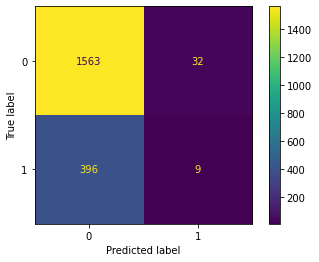

In [ ]:
y_pred_with_threshold_filtered = (y_pred_proba_lr_filtered[:,1] >= 0.6).astype(int)
cm=confusion_matrix(y_test_filtered,y_pred_with_threshold_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
sensitivity_specificity(cm)

{'sensitivity': 0.9799373040752352, 'specificity': 0.022222222222222254}

In [ ]:
fpr_lr_filtered, tpr_lr_filtered, thr_lr_filtered = roc_curve(y_test_filtered,  y_pred_proba_lr_filtered[:,1])

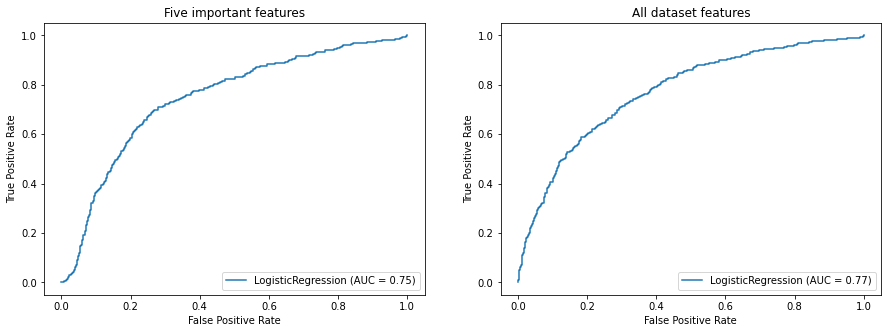

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.plot(fpr_lr_filtered,tpr_lr_filtered,label=lr_filtered.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_lr_filtered[:,1]),2))+")")
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc='lower right')
ax1.set_title("Five important features")

ax2.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc='lower right')
ax2.set_title("All dataset features")
fig.show()

In [ ]:
knn_test = KNeighborsClassifier()
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn_test, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train_filtered, y_train_filtered)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
{'n_neighbors': 19}
0.8407500000000001


In [343]:
knn_f = KNeighborsClassifier(19)
knn_f.fit(x_train_filtered,y_train_filtered)
knn_f.score(x_train_filtered,y_train_filtered)
y_pred_knn_f = knn_f.predict(x_test_filtered)
accuracy_score(y_test_filtered,y_pred_knn_f)

0.8365

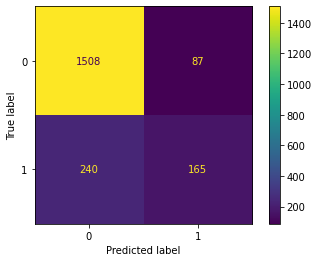

In [344]:
cm = confusion_matrix(y_test_filtered,y_pred_knn_f)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [345]:
sensitivity_specificity(cm)

{'sensitivity': 0.9454545454545454, 'specificity': 0.40740740740740744}

In [346]:
y_pred_proba_knn_f = knn_f.predict_proba(x_test_filtered)
fpr_knn_f, tpr_knn_f, th_knn_f = roc_curve(y_test_filtered,  y_pred_proba_knn_f[:,1])

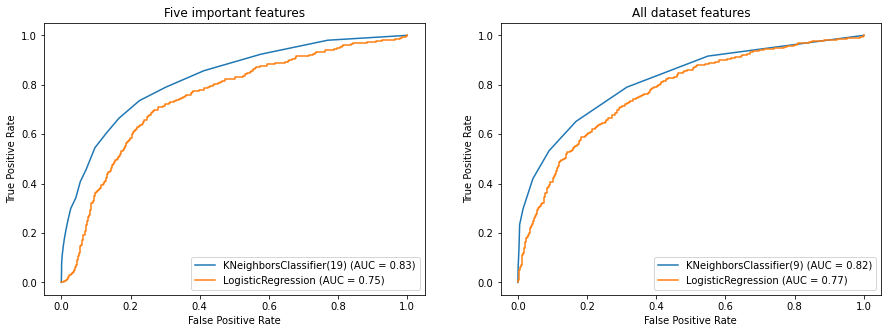

In [347]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.plot(fpr_knn_f,tpr_knn_f,label=knn_f.__class__.__name__+"(19) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_knn_f[:,1]),2))+")")
ax1.plot(fpr_lr_filtered,tpr_lr_filtered,label=lr_filtered.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_lr_filtered[:,1]),2))+")")

ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc='lower right')
ax1.set_title("Five important features")

ax2.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
ax2.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")

ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc='lower right')
ax2.set_title("All dataset features")
fig.show()

In [348]:
svc_rbf_f = SVC(kernel="rbf",probability=True)
svc_rbf_f.fit(x_train_filtered,y_train_filtered)
y_pred_svc_rbf_f = svc_rbf_f.predict(x_test_filtered)

In [349]:
accuracy_score(y_test_filtered,y_pred_svc_rbf_f)

0.8335

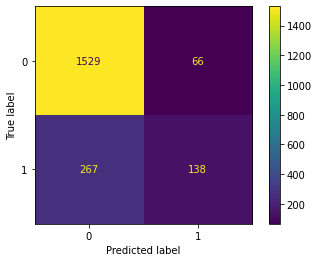

In [350]:
cm=confusion_matrix(y_test_filtered,y_pred_svc_rbf_f)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [351]:
sensitivity_specificity(cm)

{'sensitivity': 0.9586206896551724, 'specificity': 0.3407407407407408}

In [352]:
y_pred_proba_svc_rbf_f = svc_rbf_f.predict_proba(x_test_filtered)
fpr_svc_rbf_f, tpr_svc_rbf_f, th_svc_rbf_f = roc_curve(y_test_filtered,  y_pred_proba_svc_rbf_f[:,1])

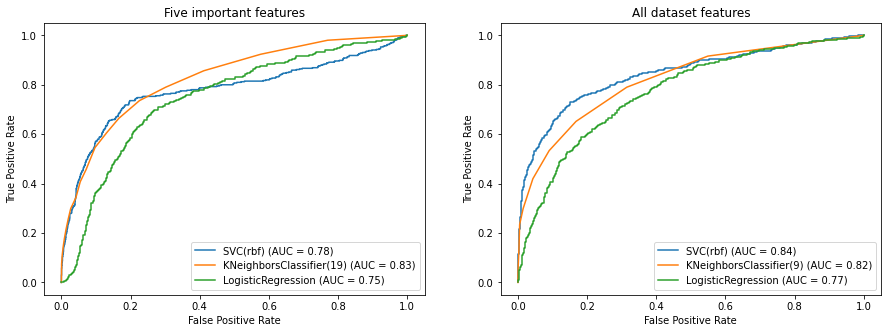

In [353]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


ax1.plot(fpr_svc_rbf_f,tpr_svc_rbf_f,label=svc_rbf_f.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_svc_rbf_f[:,1]),2))+")")
ax1.plot(fpr_knn_f,tpr_knn_f,label=knn_f.__class__.__name__+"(19) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_knn_f[:,1]),2))+")")
ax1.plot(fpr_lr_filtered,tpr_lr_filtered,label=lr_filtered.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_lr_filtered[:,1]),2))+")")

ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc='lower right')
ax1.set_title("Five important features")

ax2.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
ax2.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
ax2.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")

ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc='lower right')
ax2.set_title("All dataset features")
fig.show()

In [354]:
dtc_f = DecisionTreeClassifier(max_depth=5)
dtc_f.fit(x_train_filtered,y_train_filtered)
y_pred_dtc_f = dtc_f.predict(x_test_filtered)
accuracy_score(y_test_filtered,y_pred_dtc_f)

0.837

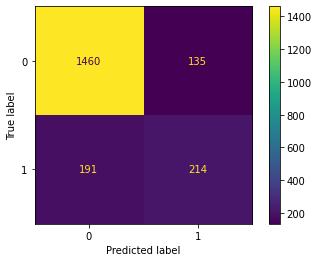

In [355]:
cm=confusion_matrix(y_test_filtered,y_pred_dtc_f)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [356]:
sensitivity_specificity(cm)

{'sensitivity': 0.9153605015673981, 'specificity': 0.528395061728395}

In [357]:
y_pred_proba_dtc_f = dtc_f.predict_proba(x_test_filtered)
fpr_dtc_f, tpr_dtc_f, th_dtc_f = roc_curve(y_test_filtered,  y_pred_proba_dtc_f[:,1])

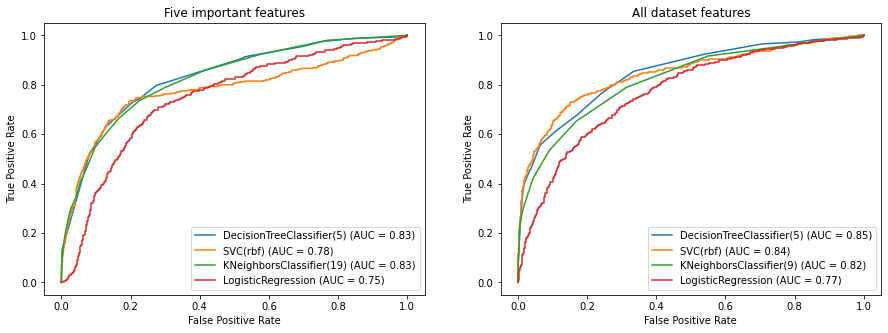

In [358]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(fpr_dtc_f,tpr_dtc_f,label=dtc_f.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_dtc_f[:,1]),2))+")")
ax1.plot(fpr_svc_rbf_f,tpr_svc_rbf_f,label=svc_rbf_f.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_svc_rbf_f[:,1]),2))+")")
ax1.plot(fpr_knn_f,tpr_knn_f,label=knn_f.__class__.__name__+"(19) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_knn_f[:,1]),2))+")")
ax1.plot(fpr_lr_filtered,tpr_lr_filtered,label=lr_filtered.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_lr_filtered[:,1]),2))+")")

ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc='lower right')
ax1.set_title("Five important features")

ax2.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
ax2.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
ax2.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
ax2.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")

ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc='lower right')
ax2.set_title("All dataset features")
fig.show()

In [359]:
rfc_f = RandomForestClassifier(500)
rfc_f.fit(x_train_filtered,y_train_filtered)
y_pred_rfc_f = rfc_f.predict(x_test_filtered)
accuracy_score(y_test_filtered,y_pred_rfc_f)

0.8355

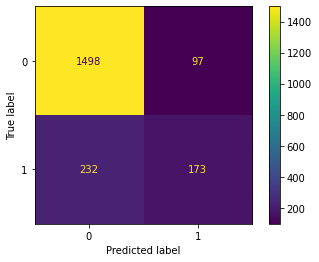

In [360]:
cm=confusion_matrix(y_test_filtered,y_pred_rfc_f)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [361]:
sensitivity_specificity(cm)

{'sensitivity': 0.9391849529780564, 'specificity': 0.4271604938271605}

In [362]:
y_pred_proba_rfc_f = rfc_f.predict_proba(x_test_filtered)
fpr_rfc_f, tpr_rfc_f, th_rfc_f = roc_curve(y_test_filtered,  y_pred_proba_rfc_f[:,1])

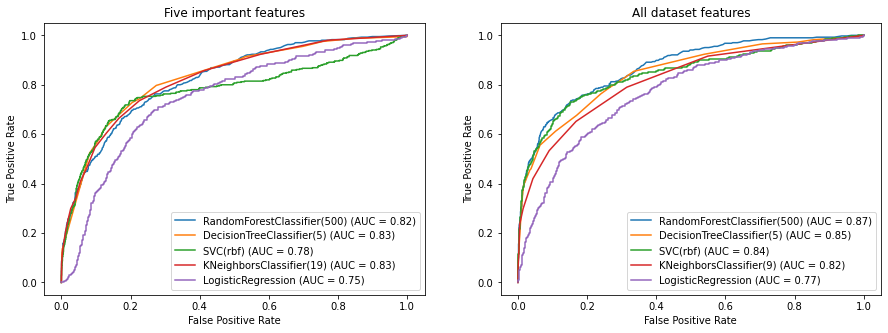

In [363]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(fpr_rfc_f,tpr_rfc_f,label=rfc_f.__class__.__name__+"(500) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_rfc_f[:,1]),2))+")")
ax1.plot(fpr_dtc_f,tpr_dtc_f,label=dtc_f.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_dtc_f[:,1]),2))+")")
ax1.plot(fpr_svc_rbf_f,tpr_svc_rbf_f,label=svc_rbf_f.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_svc_rbf_f[:,1]),2))+")")
ax1.plot(fpr_knn_f,tpr_knn_f,label=knn_f.__class__.__name__+"(19) (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_knn_f[:,1]),2))+")")
ax1.plot(fpr_lr_filtered,tpr_lr_filtered,label=lr_filtered.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test_filtered,  y_pred_proba_lr_filtered[:,1]),2))+")")

ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc='lower right')
ax1.set_title("Five important features")

ax2.plot(fpr_rfc,tpr_rfc,label=rfc.__class__.__name__+"(500) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_rfc[:,1]),2))+")")
ax2.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
ax2.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
ax2.plot(fpr_knn_9,tpr_knn_9,label=knn_9.__class__.__name__+"(9) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_9[:,1]),2))+")")
ax2.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")

ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc='lower right')
ax2.set_title("All dataset features")
fig.show()

In [364]:
accuracy_tab = {}
accuracy_tab[rfc.__class__.__name__]=[accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_rfc_f)]
accuracy_tab[dtc.__class__.__name__]=[accuracy_score(y_test,y_pred_dtc),accuracy_score(y_test_filtered,y_pred_dtc_f)]
accuracy_tab[svc.__class__.__name__]=[accuracy_score(y_test,y_pred_svc_rbf),accuracy_score(y_test_filtered,y_pred_svc_rbf_f)]
accuracy_tab[knn.__class__.__name__]=[accuracy_score(y_test,y_pred_knn),accuracy_score(y_test_filtered,y_pred_knn_f)]
accuracy_tab[lr.__class__.__name__]=[accuracy_score(y_test,y_pred_lr),accuracy_score(y_test_filtered,y_pred_lr_filtered)]

In [365]:
from pandas import DataFrame
accdf = DataFrame().from_dict(accuracy_tab)
accdf = accdf.transpose()
accdf.columns = ["tous features","top 5 features"]

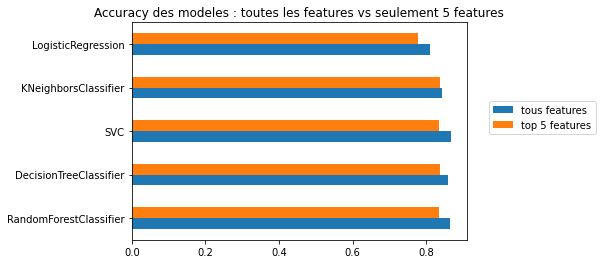

In [366]:
ax = accdf.plot(kind='barh')
ax.set_title("Accuracy des modeles : toutes les features vs seulement 5 features")
plt.legend(bbox_to_anchor=(1.4,0.66))
plt.show()

les valeurs d'AUC a eté diminuer un peut a cause de l'absence des 6 features admet importance < 0.1. <br/>
aussi l'accuracy a eté affecté negativement. <br/>
on peut accepter toutes les modeles si on utilise toutes les features.<br/> avec 5 features seulement le modele Logistic Regression est refusé car accuracy < 0.8.